# Fitting
---

### Method of least squares


First, define the **residual** - The difference between the observed value and the predicted value, where the predicted value comes from a model, from a fit, or from some other estimation technique.


The **method of least squares** - find the functional fit that minimizes the sum of squares of the residuals 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

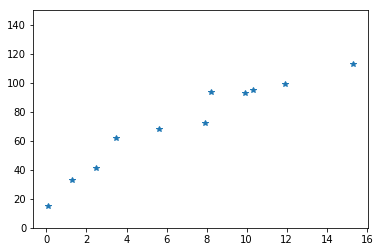

In [3]:
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints = [15 , 33, 41, 62, 68, 72, 94, 93, 95, 99, 113 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)
plt.plot(xa,ya,"*")
plt.ylim(0,150)
plt.show()

777.36
6
30


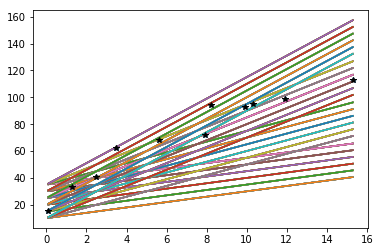

In [8]:
# Least squares "by hand"

xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints = [15 , 33, 41, 62, 68, 72, 94, 93, 95, 99, 113 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)

a_array = np.arange(2,10,2)
b_array = np.arange(10,40,5)

min_sum_squares = 999999999999
min_sum_squares_a = 1
min_sum_squares_b = 1



for a in a_array:
    for b in b_array:
        sum_squares = 0
        for index, xdata in enumerate(xa):
            observed = ya[index]
            predicted = a*xdata+b
            residual = observed - predicted
            res2 = residual * residual
            sum_squares +=res2
            plt.plot(xa,func(xa,a,b))

        if (sum_squares<min_sum_squares):
            min_sum_squares = sum_squares
            min_sum_squares_a = a
            min_sum_squares_b = b
            
            
print(min_sum_squares)
print(min_sum_squares_a)
print(min_sum_squares_b)            

plt.plot(xa,ya,"*", color="Black")            
plt.show()

In [9]:
# Least squares "by hand"

xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints = [15 , 33, 41, 62, 68, 72, 94, 93, 95, 99, 113 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)

a_array = np.arange(0,20,0.1)
b_array = np.arange(-20,50,0.5)

min_sum_squares = 999999999999
min_sum_squares_a = 1
min_sum_squares_b = 1

for a in a_array:
    for b in b_array:
        sum_squares = 0
        for index, xdata in enumerate(xa):
            observed = ya[index]
            predicted = a*xdata+b
            residual = observed - predicted
            res2 = residual * residual
            sum_squares +=res2
        if (sum_squares<min_sum_squares):
            min_sum_squares = sum_squares
            min_sum_squares_a = a
            min_sum_squares_b = b
            
print(min_sum_squares)
print(min_sum_squares_a)
print(min_sum_squares_b)

762.1869
6.3
27.5


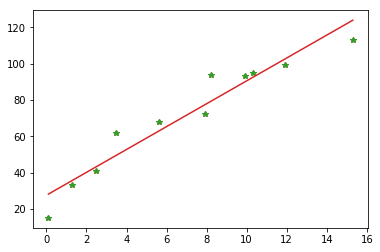

In [12]:
def func(x, a, b):
    return a * x + b

plt.plot(xa,ya,"*")
plt.plot(xa,func(xa,min_sum_squares_a,min_sum_squares_b))
plt.show()

#### scipy fitting tools

scipy.optimize.least_squares
https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.least_squares.html

scipy.optimize.curve_fit
https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.curve_fit.html


In [13]:
from scipy.optimize import curve_fit

In [15]:
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, xa, ya, p0 = [1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]

print("fit_result_a", fit_result_a)
print("fit_result_b", fit_result_b)

fit_result_a 6.25004962422
fit_result_b 27.8973821504


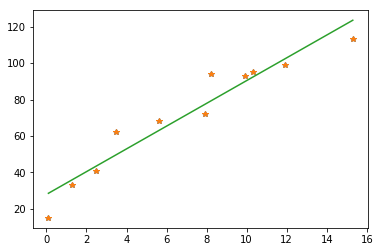

In [16]:
xaa = np.linspace(0.1,16,200)
plt.plot(xa,ya,"*")
plt.plot(xa,func(xa,fit_result_a,fit_result_b))
plt.show()

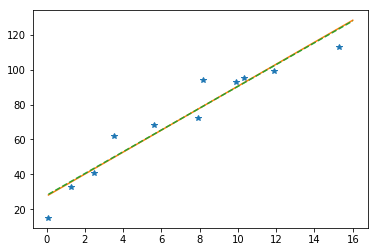

In [17]:
#Compare "by hand" and curve_fit
plt.plot(xa,ya,"*")
plt.plot(xaa,func(xaa,min_sum_squares_a,min_sum_squares_b))
plt.plot(xaa,func(xaa,fit_result_a,fit_result_b),"--")
plt.show()

In [18]:
def func2(x, a, b, c):
    return a * x * x + b * x + c

popt, pcov = curve_fit(func2, xa, ya, p0 = [1, 1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]
fit_result_c   = popt[2]

print("fit_result_a", fit_result_a)
print("fit_result_b", fit_result_b)
print("fit_result_c", fit_result_c)

fit_result_a -0.29770469226
fit_result_b 10.5637630296
fit_result_c 18.493488756


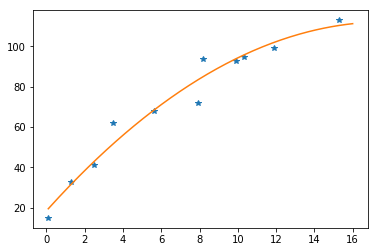

In [19]:
plt.plot(xa,ya,"*")
plt.plot(xaa,func2(xaa, fit_result_a, fit_result_b, fit_result_c))
plt.show()

In [20]:
def func3(x, a, b, c, d):
    return a * x * x * x + b * x * x + c * x + d

popt, pcov = curve_fit(func3, xa, ya, p0 = [1, 1, 1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]
fit_result_c   = popt[2]
fit_result_d   = popt[3]

print("fit_result_a", fit_result_a)
print("fit_result_b", fit_result_b)
print("fit_result_c", fit_result_c)
print("fit_result_d", fit_result_d)

fit_result_a 0.0273381426479
fit_result_b -0.943795638696
fit_result_c 14.5027295004
fit_result_d 14.3985908984


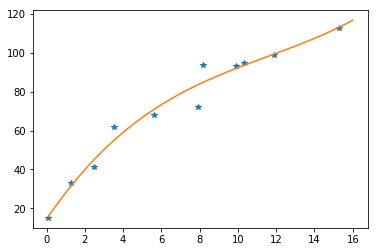

In [21]:
plt.plot(xa,ya,"*")
plt.plot(xaa,func3(xaa, fit_result_a, fit_result_b, fit_result_c, fit_result_d))
plt.show()

In [22]:
def func6(x, a6,a5,a4,a3,a2,a1,a0):
    return a6*x**6+a5*x**5+a4*x**4+a3*x**3+a2*x**2+a1*x+a0

popt, pcov = curve_fit(func6, xa, ya, p0 = [1, 1, 1, 1, 1, 1, 1])

fa6   = popt[0]
fa5   = popt[1]
fa4   = popt[2]
fa3   = popt[3]
fa2   = popt[4]
fa1   = popt[5]
fa0   = popt[6]

print("fa6", fa6)
print("fa5", fa5)
print("fa4", fa4)
print("fa3", fa3)
print("fa2", fa2)
print("fa1", fa1)
print("fa0", fa0)

fa6 0.000489834095532
fa5 -0.0208601797612
fa4 0.327023651142
fa3 -2.27416322999
fa2 6.02927624194
fa1 7.70134413397
fa0 14.5632394315


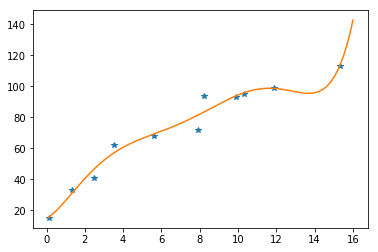

In [168]:
plt.plot(xa,ya,"*")
plt.plot(xaa,func6(xaa, fa6, fa5, fa4, fa3, fa2, fa1, fa0))
plt.show()

In [26]:
def func8(x, a8,a7,a6,a5,a4,a3,a2,a1,a0):
    return a8*x**8+a7*x**7+a6*x**6\
          +a5*x**5+a4*x**4+a3*x**3+a2*x**2+a1*x+a0

popt, pcov = curve_fit(func8, xa, ya, p0 = [ 1, 1, 1, 1, 1, 1, 1, 1,1])

fa8 = popt[0]
fa7 = popt[1]
fa6 = popt[2]
fa5 = popt[3]
fa4 = popt[4]
fa3 = popt[5]
fa2 = popt[6]
fa1 = popt[7]
fa0 = popt[8]


print("fa8", fa8)
print("fa7", fa7)
print("fa6", fa6)
print("fa5", fa5)
print("fa4", fa4)
print("fa3", fa3)
print("fa2", fa2)
print("fa1", fa1)
print("fa0", fa0)

fa8 -0.000301651536828
fa7 0.0166810702831
fa6 -0.372856555093
fa5 4.3253282937
fa4 -27.7634228113
fa3 97.0273933254
fa2 -169.060870112
fa1 128.332655363
fa0 3.75110503546


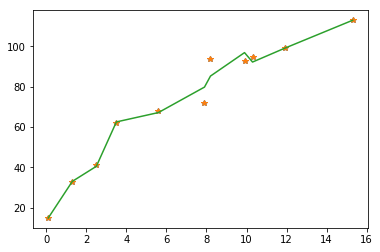

In [27]:
plt.plot(xa,ya,"*")
plt.plot(xa,func8(xa, fa8, fa7, fa6, fa5, fa4, fa3, fa2, fa1, fa0))
plt.show()

In [23]:
def func10(x, a10,a9,a8,a7,a6,a5,a4,a3,a2,a1,a0):
    return a10*x**10+a9*x**9+a8*x**8+a7*x**7+a6*x**6\
          +a5*x**5+a4*x**4+a3*x**3+a2*x**2+a1*x+a0

popt, pcov = curve_fit(func10, xa, ya, p0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1])

fa10   = popt[0]
fa9   = popt[1]
fa8   = popt[2]
fa7   = popt[3]
fa6   = popt[4]
fa5   = popt[5]
fa4   = popt[6]
fa3   = popt[7]
fa2   = popt[8]
fa1   = popt[9]
fa0   = popt[10]

print("fa10", fa10)
print("fa9", fa9)
print("fa8", fa8)
print("fa7", fa7)
print("fa6", fa6)
print("fa5", fa5)
print("fa4", fa4)
print("fa3", fa3)
print("fa2", fa2)
print("fa1", fa1)
print("fa0", fa0)

fa10 0.000169121533015
fa9 -0.0115335305796
fa8 0.334554947992
fa7 -5.39082370476
fa6 52.8468387592
fa5 -324.426460515
fa4 1237.04571722
fa3 -2804.88505478
fa2 3430.3777726
fa1 -1781.50347439
fa0 161.53094215


/Applications/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


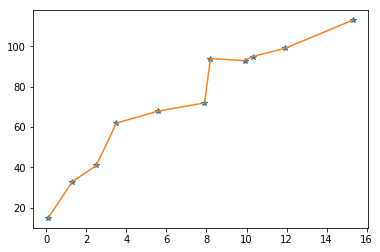

In [24]:
plt.plot(xa,ya,"*")
plt.plot(xa,func10(xa, fa10, fa9, fa8, fa7, fa6, fa5, fa4, fa3, fa2, fa1, fa0))
plt.show()

In [30]:
print(xa)

[  0.1   1.3   2.5   3.5   5.6   7.9   8.2   9.9  10.3  11.9  15.3]


In [31]:
print(ya)

[  15.   33.   41.   62.   68.   72.   94.   93.   95.   99.  113.]


In [32]:
def funcLog(x, a, b):
    return a * np.log(b*x)

popt, pcov = curve_fit(funcLog, xa, ya, p0 = [1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]


print("fit_result_a", fit_result_a)
print("fit_result_b", fit_result_b)


fit_result_a 19.6457166782
fit_result_b 8.94834380888


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


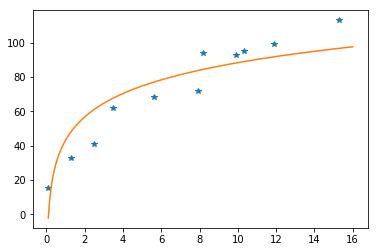

In [29]:
manydiv = np.linspace(0.1,16,200)

plt.plot(xa,ya,"*")
plt.plot(xaa,funcLog(xaa, fit_result_a, fit_result_b))
plt.show()

In [33]:
def funcLog2(x, a, b, c ,d):
    return a * np.log(b*x) +  c * x +d

popt, pcov = curve_fit(funcLog2, xa, ya, p0 = [1, 1, 1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]
fit_result_c   = popt[2]
fit_result_d   = popt[3]


print("fit_result_a", fit_result_a)
print("fit_result_b", fit_result_b)


fit_result_a 7.80531854532
fit_result_b 141.198348616


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


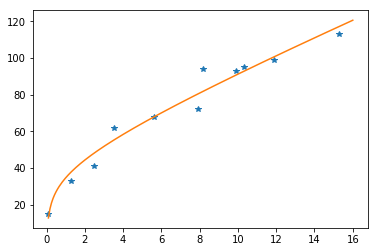

In [34]:

plt.plot(xa,ya,"*")
plt.plot(xaa,funcLog2(xaa, fit_result_a, fit_result_b , fit_result_c, fit_result_d))
plt.show()

### Taking uncertainties into account

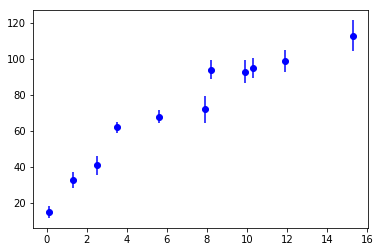

In [175]:
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints  = [15 ,  33,  41,  62,  68,  72,  94,  93,  95,  99, 113 ]
yerrlist = [3.3, 4.4, 5.3, 3.2, 3.5, 7.3, 5.3, 6.5, 5.4, 6.3, 8.6 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)
yerra = np.array(yerrlist,float)

plt.errorbar(xa, ya, yerra, fmt="o",color="Blue",linestyle='')#
plt.show()

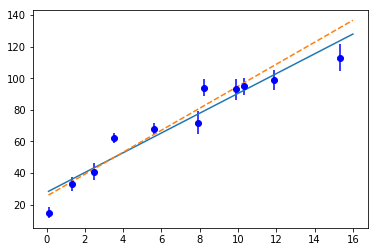

In [177]:
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, xa, ya, p0 = [1, 1])
fit_result_a   = popt[0]
fit_result_b   = popt[1]


popt, pcov = curve_fit(func, xa, ya, p0 = [1, 1], sigma = yerra)
fit_result_a_with_error   = popt[0]
fit_result_b_with_error   = popt[1]

plt.errorbar(xa, ya, yerra, fmt="o",color="Blue",linestyle='')#

plt.plot(xaa,func(xaa,fit_result_a,fit_result_b),"-")
plt.plot(xaa,func(xaa,fit_result_a_with_error,fit_result_b_with_error),"--")
plt.show()

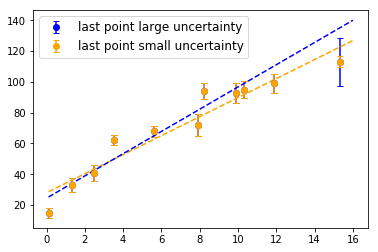

In [178]:
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints  = [15 ,  33,  41,  62,  68,  72,  94,  93,  95,  99, 113 ]
yerrlist1 = [3.3, 4.4, 5.3, 3.2, 3.5, 7.3, 5.3, 6.5, 5.4, 6.3, 3.6 ]
yerrlist2 = [3.3, 4.4, 5.3, 3.2, 3.5, 7.3, 5.3, 6.5, 5.4, 6.3, 15.6 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)
yerra1 = np.array(yerrlist1,float)
yerra2 = np.array(yerrlist2,float)

popt1, pcov1 = curve_fit(func, xa, ya, p0 = [1, 1], sigma = yerra1)
popt2, pcov2 = curve_fit(func, xa, ya, p0 = [1, 1], sigma = yerra2)

fit_result_a_with_error1   = popt1[0]
fit_result_b_with_error1   = popt1[1]
fit_result_a_with_error2   = popt2[0]
fit_result_b_with_error2   = popt2[1]


plt.errorbar(xa, ya, yerra2, fmt="o",color="Blue",linestyle='', capsize=3, label='last point large uncertainty')#
plt.errorbar(xa, ya, yerra1, fmt="o",color="Orange",linestyle='', capsize=3, label='last point small uncertainty')#


plt.plot(xaa,func(xaa,fit_result_a_with_error1,fit_result_b_with_error1),"--",color="Orange")
plt.plot(xaa,func(xaa,fit_result_a_with_error2,fit_result_b_with_error2),"--",color="Blue")

plt.legend(loc='upper left', fontsize='large')

plt.show()

In [35]:
# Least squares "by hand" with uncertainty

xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints = [15 , 33, 41, 62, 68, 72, 94, 93, 95, 99, 113 ]
yerrlist = [3.3, 4.4, 5.3, 3.2, 3.5, 7.3, 5.3, 6.5, 5.4, 6.3, 8.6 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)
yerra = np.array(yerrlist,float)


a_array = np.arange(0,20,0.1)
b_array = np.arange(-20,50,0.5)

min_sum_squares = 999999999999
min_sum_squares_a = 1
min_sum_squares_b = 1



for a in a_array:
    for b in b_array:
        sum_squares = 0
        for index, xdata in enumerate(xa):
            observed = ya[index]
            predicted = a*xdata+b
            residual = observed - predicted
            sigma  = yerra[index]
            pull =  (residual/sigma)
            sum_squares +=pull*pull
        if (sum_squares<min_sum_squares):
            min_sum_squares = sum_squares
            min_sum_squares_a = a
            min_sum_squares_b = b
            
print(min_sum_squares)
print(min_sum_squares_a)
print(min_sum_squares_b)

40.4749327694
6.9
25.5


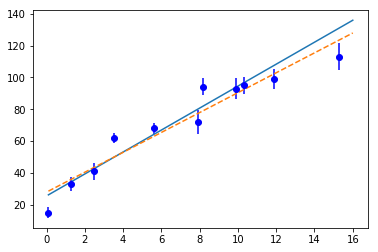

In [36]:
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, xa, ya, p0 = [1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]

plt.errorbar(xa, ya, yerra, fmt="o",color="Blue",linestyle='')#

plt.plot(xaa,func(xaa,min_sum_squares_a,min_sum_squares_b))

plt.plot(xaa,func(xaa,fit_result_a,fit_result_b),"--")

plt.show()

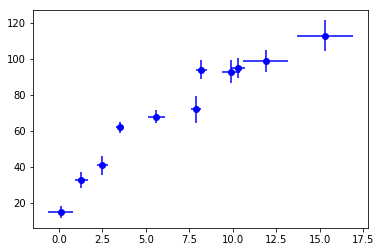

In [38]:
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints  = [15 ,  33,  41,  62,  68,  72,  94,  93,  95,  99, 113 ]
yerrlist = [3.3, 4.4, 5.3, 3.2, 3.5, 7.3, 5.3, 6.5, 5.4, 6.3, 8.6 ]
xerrlist = [0.7, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.5, 0.4, 1.3, 1.6 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)
xerra = np.array(xerrlist,float)
yerra = np.array(yerrlist,float)

plt.errorbar(xa, ya, xerr=xerra ,yerr=yerra, fmt="o",color="Blue",linestyle='')#
plt.show()

In [39]:
xpoints = [0.1,1.3,2.5,3.5,5.6,7.9,8.2,9.9,10.3,11.9, 15.3]
ypoints  = [15 ,  33,  41,  62,  68,  72,  94,  93,  95,  99, 113 ]
yerrlist = [3.3, 4.4, 5.3, 3.2, 3.5, 7.3, 5.3, 6.5, 5.4, 6.3, 8.6 ]
xerrlist = [0.7, 0.4, 0.3, 0.2, 0.5, 0.3, 0.3, 0.5, 0.4, 1.3, 1.6 ]
xa = np.array(xpoints,float)
ya = np.array(ypoints,float)
xerra = np.array(xerrlist,float)
yerra = np.array(yerrlist,float)


a_array = np.arange(0,20,0.1)
b_array = np.arange(-20,50,0.5)

min_sum_squares = 999999999999
min_sum_squares_a = 1
min_sum_squares_b = 1



for a in a_array:
    for b in b_array:
        sum_squares = 0
        for index, xdata in enumerate(xa):
            observed = ya[index]
            predicted = a*xdata+b
            residual = observed - predicted
            sigmay  = yerra[index]
            sigmax  = xerra[index]
            sum_squares +=residual*residual/(sigmay*sigmay+b*b*sigmax*sigmax)
        if (sum_squares<min_sum_squares):
            min_sum_squares = sum_squares
            min_sum_squares_a = a
            min_sum_squares_b = b
            
print(min_sum_squares)
print(min_sum_squares_a)
print(min_sum_squares_b)

3.69016312518
5.5
38.5


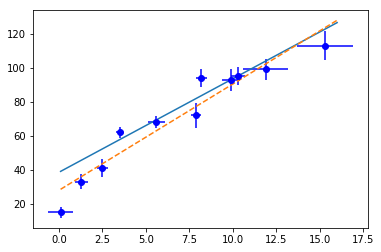

In [40]:
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, xa, ya, p0 = [1, 1])

fit_result_a   = popt[0]
fit_result_b   = popt[1]

plt.errorbar(xa, ya, xerr=xerra ,yerr=yerra, fmt="o",color="Blue",linestyle='')#

plt.plot(xaa,func(xaa,min_sum_squares_a,min_sum_squares_b))

plt.plot(xaa,func(xaa,fit_result_a,fit_result_b),"--")

plt.show()

### Fitting a histogram

No     =  164.701255262
tau_mu =  44.6322481602
B      =  2.67720786077

**************************************************
Fit result: N(t)= 164.701*e^(-t/44.6322)+2.67721
**************************************************


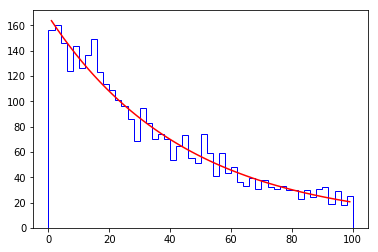

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Create some fake data with np.random.exponential
Npoints = 4000
scale    = 7      # f(x)=(1/scale)e^(-x/scale)
s = 7*np.random.exponential(scale, Npoints) - 1 

# Normally we do this to plot:
# plt.hist(s, bins=100, normed=True, histtype='step',color='blue')

# Instead we can do the following such that we access the tuple
#      returned by plt.hist returns a tuple 
#      which contains arrays of the information that is being plotted:
#      ( http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist
#    n = array containing the number of entries in each bin )
#    bins = array containing the bin edges (so the length is nbins +1)

(n,bins,patches) = plt.hist(s, bins=50,  range=(0,100), normed=False, histtype='step',color='blue')

# to fit we an array of bin centers:
bin_centers = 0.5*(bins[1:] + bins[:-1])

# define the function to fit
def f(t, No, tau_mu, B):
    return No*np.exp(-t/tau_mu) + B

# scipy.optimize.curve_fit
# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.curve_fit.html
# curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)[source]¶
# p0 is the initial guess for the function parameters
popt, pcov = curve_fit(f, bin_centers, n, p0 = [1, 1, 1])

# curve_fit returns popt which is an array of the fit parameters
fit_result_No     = popt[0]
fit_result_tau_mu = popt[1]
fit_result_B      = popt[2]

print("No     = " , fit_result_No    )
print("tau_mu = " , fit_result_tau_mu)
print("B      = " , fit_result_B     )
print()
print("*"*50)
print("Fit result: N(t)= ",'{:g}'.format(fit_result_No),"*e^(-t/",'{:g}'.format(fit_result_tau_mu),")+",'{:g}'.format(fit_result_B),  sep='')
print("*"*50)


plt.plot(bin_centers, f(bin_centers, fit_result_No, fit_result_tau_mu, fit_result_B  ), 'r')
plt.show()

Error on the fit:

http://nbviewer.jupyter.org/url/media.usm.maine.edu/~pauln/ScipyScriptRepo/CurveFitWith1SigmaBand.ipynb